In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.model_selection as model
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as skl_MSE
from sklearn.metrics import confusion_matrix as CM
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.integrate

In [19]:
data = pd.read_csv('OJ.csv').dropna()
Xname= data.keys().drop('Store7').drop('Purchase').drop('Unnamed: 0')
X = data[Xname].values
Y = data[['Purchase']].values

In [20]:
#RandomRorest
X_train, X_test, Y_train, Y_test = model.train_test_split(X,Y,test_size=0.5)
p = len(Y_train)
m1 = int(np.sqrt(p))
m2 = p
m3 = int(p/2)
nT = np.array(np.linspace(1,500,500))

#Para m1, m2 y m3
Err1 = np.zeros(len(nT))
Err2 = np.zeros(len(nT))
Err3 = np.zeros(len(nT))
for i in range(len(nT)):
    #m1
    clf1 = RFC(n_estimators=int(nT[0]), criterion='gini', max_depth=None, min_samples_split=m1, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None)
    clf1.fit(X_train,Y_train)
    Y_pred = clf1.predict(X_test)
    tn, fp, fn, tp = CM(Y_test,Y_pred).ravel()
    Err1[i] = (tp/(tp+fn))
    
    #m2
    clf2 = RFC(n_estimators=int(nT[0]), criterion='gini', max_depth=None, min_samples_split=m2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None)
    clf2.fit(X_train,Y_train)
    Y_pred = clf2.predict(X_test)
    tn, fp, fn, tp = CM(Y_test,Y_pred).ravel()
    Err2[i] = (tp/(tp+fn))
    
    #m2
    clf3 = RFC(n_estimators=int(nT[0]), criterion='gini', max_depth=None, min_samples_split=m3, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None)
    clf3.fit(X_train,Y_train)
    Y_pred = clf3.predict(X_test)
    tn, fp, fn, tp = CM(Y_test,Y_pred).ravel()
    Err3[i] = (tp/(tp+fn))

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed whe

Text(0, 0.5, 'Test Classification Error')

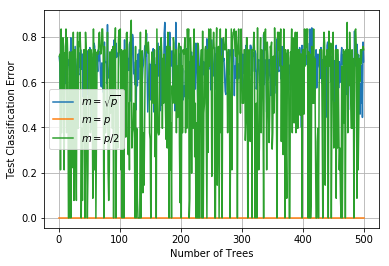

In [16]:
plt.plot(nT,Err1, label='$m = \sqrt{p}$')
plt.plot(nT,Err2, label='$m = p$')
plt.plot(nT,Err3, label='$m = p/2$')
plt.grid()
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Test Classification Error')

In [25]:
#parte2
#Logistic Regression
clf_LR = LR().fit(X_train,Y_train)
Y_pred = clf_LR.predict(X_test)
tn, fp, fn, tp = CM(Y_test,Y_pred).ravel()
Err_LR = (tp/(tp+fn))

print('Error para Logistic Regression =',Err_LR)

#LDA
clf_LDA = LDA().fit(X_train,Y_train)
Y_pred = clf_LDA.predict(X_test)
tn, fp, fn, tp = CM(Y_test,Y_pred).ravel()
Err_LDA = (tp/(tp+fn))

print('Error para Logistic Regression =',Err_LDA)

#Random Forest
clf_RFC = RFC(n_estimators=int(nT[0]), criterion='gini', max_depth=None, min_samples_split=m1, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None)
clf_LR = LR().fit(X_train,Y_train)
Y_pred = clf_LR.predict(X_test)
tn, fp, fn, tp = CM(Y_test,Y_pred).ravel()
Err_LR = (tp/(tp+fn))

print('Error para Logistic Regression =',Err_LR)

Error para Logistic Regression = 0.7703349282296651
Error para Logistic Regression = 0.8038277511961722


/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
